# Classifying Heart Disease Patients 

**Research question:** What is the relationship between specific physiological factors of an individual and the probability of a diagnosis of heart disease?

**Introduction:** 

The number one cause of death in the world today is cardiovascular disease, accounting for approximately 17.9 million lives lost each year. Some of the most common cardiovascular diseases are: coronary heart disease, strokes, aortic disease, and pericarditis. The prevention and early detection of heart disease is an important research area that many people benefit from worldwide. As of late, scientists have found many mitigation techniques in order to slow the deterioration of heart health in individuals who are genetically predisposed to heart disease. Researchers state that “People with hypertension (blood pressure ≥140/90 mm Hg or those receiving blood pressure-lowering drugs) had a lifetime risk of overall cardiovascular disease at 30 years of age” (Rapsomaniki et al., 2014). These statistics further stress the importance of early detection of cardiovascular disease in populations.  In an effort to increase the chance of early detection of heart disease, we must be attentive to the physiological factors that may indicate risk of heart disease.  Our data set gives information on a variety of physiological factors such as age, cholesterol, resting ECG levels etc. In this project, we would like to determine the relationship between physiological attributes and the detection of heart disease within an individual. For our model, we would like to specifically focus on the use of  the level of cholesterol, age, resting blood pressure, and maximum heart rate in the Heart Failure Prediction Data Set to determine if we can predict whether or not an individual has heart disease (Fedesoriano 2021). 

**Methods:**

Our four selected predictors are age, resting blood pressure , maximum heart rate achieved in an hour, and cholesterol. To design a “k nearest neighbor” classification model we had to first split the data into training and testing sets. We then used the training split to create classification scatter plots using age as a common variable, we qualitatively assessed each variable's correlation to heart disease. Looking at the graph of cholesterol vs age, with “having/not having” heart disease as the color of the points, it was clearly visible that for this data set there was little to no correlation for cholesterol to properly estimate heart disease in an individual.  It was also evident from the visualizations, the other three predictors displayed a strong enough correlation with assessing heart disease that they would be useful in the model. Once cholesterol was deemed unfit, we created a new test/train split using a modified data set which omitted the cholesterol column. Our next step was to find the optimal nearest neighbor value in order to give the most accurate prediction possible when new data is entered into the model. We first performed a 5 fold-cross validation on the training set in order to find multiple validation splits and increase the accuracy of our k value chosen. Next, the model specification was built using the k nearest neighbors for the engine, set to “classification” for the mode, as well as using tune() in order to find the best fit neighbors value. We then created a workflow classifier using a tibble of k values ranging from 0 to 100 by 5, and then plotted the metrics with the accuracy estimate on the y-axis vs the neighbors value on the x. By observing the highest peak on the plot, it was determined that the k value with the highest accuracy rating (~69% on the plot) was 21. The model specification and workflow classifier were then retrained using the correct k value and the overall accuracy of the classifier was found (73.3%). A confusion matrix was then created to show the number of correctly and incorrectly classified observations by our model, and then a visualization was built using our nearest neighbor value of 21.

**Expected Outcomes and Significance:**

This data set looks at the health conditions of 919 individuals and whether or not they have some sort of condition which would be classified as heart disease. A model which allows an individual to insert their age, resting blood pressure, cholesterol levels, and maximum heart rate achieved in an hour, and returns whether they likely have heart disease or not, is a great tool that could be used by millions of people each year to better self assess their risk of heart disease. “Heart disease” however is a very complex idea with a large variety of different factors that contribute to an individual's heart health, outside of the scope of the 4 variables chosen in this model. In other words, it is meant to be a very elementary assessment tool, using variables that are easy to find by the average person in order to assess their heart health. 
Although it is a very basic design, the possibility of further additions and implementations is quite vast. An increase in the number of predictor variables as well as a broader spectrum of types of heart disease an individual is likely to have, will greatly increase the capabilities of the model and has the ability to accurately measure/diagnose heart disease without the need for extensive testing. In addition, considering the large overlap between many of the predictor variables for heart disease and other mental/physical conditions (such as stress), this model can be slightly tweaked in order to assess the health risks of individuals with respect to other potential ailments. 
It is quite well known that as your age increases, your risk of heart disease increases exponentially alongside it. It is also basic knowledge that prolonged exposure to high cholesterol and blood pressure also can lead to an increase in the chance of heart disease. The trickiest variabel to assess will be the maximum heart rate achieved in an hour. This is because the max heart rate can be determined by a variety of things, I.E. the subject's weight, ability to properly exercise, type of exercise, body type, as well as the physiological factors such as cholesterol, blood pressure, age, etc. It is likely that the maximum heart rate will be inversely proportional to cholesterol, BP, and age, meaning the lower the max HR of an individual is, the more likely they are to have heart disease. The usefulness of the model will be the ability to observe the correlation between various predictor variables and heart disease. It will give the possibility to create a reasonably accurate ranking of which variables are most connected with heart disease, in order to better inform the public about what to focus on the most when trying to minimize their risk of developing a preventable heart condition.

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(GGally)
library(cowplot)
options(repr.matrix.max.rows = 6)

In [4]:
url <- "https://raw.githubusercontent.com/amasood01/Heart-Failure-Data--DSCI100/main/heart.csv"
heart_data <- read_csv(url)
heart_data

Parsed with column specification:
cols(
  Age = col_double(),
  Sex = col_character(),
  ChestPainType = col_character(),
  RestingBP = col_double(),
  Cholesterol = col_double(),
  FastingBS = col_double(),
  RestingECG = col_character(),
  MaxHR = col_double(),
  ExerciseAngina = col_character(),
  Oldpeak = col_double(),
  ST_Slope = col_character(),
  HeartDisease = col_double()
)



Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
40,M,ATA,140,289,0,Normal,172,N,0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1,Flat,1
37,M,ATA,130,283,0,ST,98,N,0,Up,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Table 1: Heart Dataset showing a range of numerical and categorical variables that are proposed risk factors for Heart Disease (target variable)

This dataset was generated using data from 5 different heart datasets, combining all 11 features that may be related to diagnosing heart disease, making it the largest heart disease dataset available for research. The datatset utilizes a series of observations from a sample of patients, who were classified as either having heart disease or not having heart disease. 

In [5]:
heart_data_mutated <- mutate(heart_data, HeartDisease = as_factor(HeartDisease))
heart_data_mutated

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,M,ATA,140,289,0,Normal,172,N,0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1,Flat,1
37,M,ATA,130,283,0,ST,98,N,0,Up,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Table 2: Heart Dataset with the target variable (HeartDisease) changed to a factor 

In our raw dataset, HeartDisease is expressed as a numerical character, indicated by "dbl", but since we will be using HeartDisease as our target variable, we needed to convert it into a categorical statistical variable by converting it into a factor, using the as_factor function.

In [6]:
selected_coloumns <- select(heart_data_mutated, Age, RestingBP, Cholesterol, MaxHR, HeartDisease)        
selected_coloumns

Age,RestingBP,Cholesterol,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,140,289,172,0
49,160,180,156,1
37,130,283,98,0
⋮,⋮,⋮,⋮,⋮
57,130,131,115,1
57,130,236,174,1
38,138,175,173,0


Table 3: Selected coloumn variables from dataset to be used in exploratory analysis

The following four variables were selected to be used in our exploratory data analysis:

- Age: age of the patient [years]
- Resting Blood Pressure (BP): resting blood pressure [mm Hg]
- Cholesterol:  serum cholesterol [mm/dl]
- Maximum Heart rate (MaxHR): maximum heart rate achieved [Numeric value between 60 and 202]

This is because these were the only numerical variables included in the Heart Disease dataset. All other variables such as Sex and Type of chest pain were categorical hence, could not be used to classify another categorical varibale such as Heart Disease. To determine the suitability of these predictor variables, the strength of their correlation with heart disease will be examined.


Explorartory Data Analysis:

In [7]:
set.seed(2000)
heart_split <- initial_split(selected_coloumns, prop = 0.75, strata = HeartDisease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)
heart_train

Age,RestingBP,Cholesterol,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
49,160,180,156,1
48,138,214,108,1
54,150,195,122,0
⋮,⋮,⋮,⋮,⋮
68,144,193,141,1
57,130,236,174,1
38,138,175,173,0


Tables 4: Training dataset using 75% of observations from original heart dataset 

In order to perform exploratory analysis and eventually perform a KNN classification, the dataset was split into training and testing data using an unbiased random split. This training data will be used in order to carry out the exploratory analysis and determine the suitability of each predictor variable by examining their correlation with the target variable (HeartDisease).

In [8]:
heart_test

Age,RestingBP,Cholesterol,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,140,289,172,0
37,130,283,98,0
48,120,284,120,0
⋮,⋮,⋮,⋮,⋮
56,120,240,169,0
63,140,187,144,1
57,130,131,115,1


Table 5: Testing dataset using 25% of observations from original dataset

In [9]:
sleep_data_aggregate <- heart_train %>%
summarize(across(Age:MaxHR, mean, na.rm = TRUE))
sleep_data_aggregate

Age,RestingBP,Cholesterol,MaxHR
<dbl>,<dbl>,<dbl>,<dbl>
53.65167,132.6575,194.8795,135.9579


Table 6: Summary of the mean values for each predictor variable

In [10]:
sleep_data_aggregate_2 <- heart_train %>%
count(HeartDisease)
sleep_data_aggregate_2

HeartDisease,n
<fct>,<int>
0,308
1,381


Table 7: Number of Observations present for each class label

The number of observations present for each class (whether a patient was diagnosed with heart disease or not) was displayed in order to determine whether there was a class imbalance present in our dataset. Since there were 308 patients not diagnosed with heart disease versus 381 patients that were diagnosed with heart disease, the number of observations within each class is fairly balanced and any methods of oversampling is not necessary.

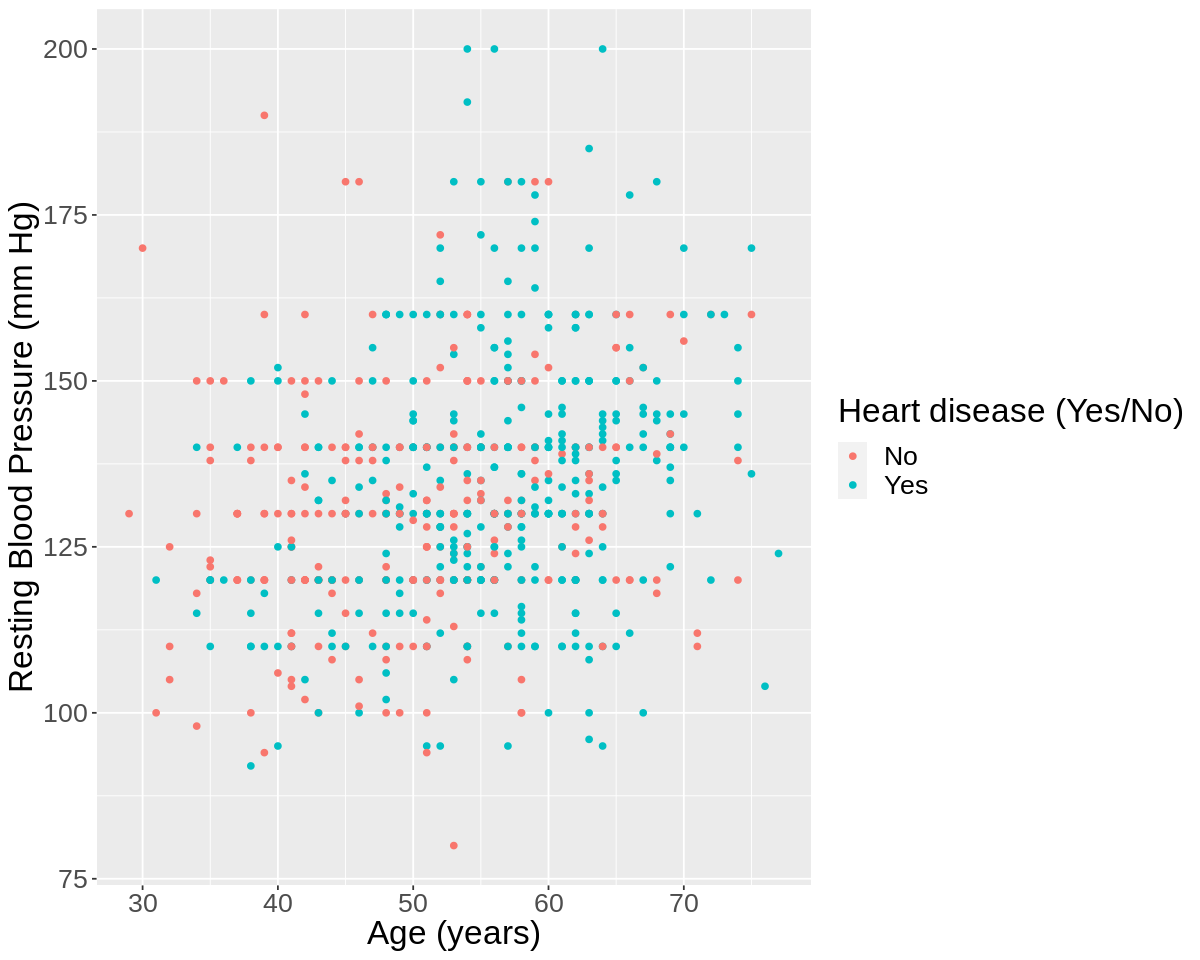

In [11]:
set.seed(2000)
options(repr.plot.width = 10, repr.plot.height = 8) 
heart_train_plot_1 <- ggplot(heart_train, aes(x = Age, y = RestingBP , color = HeartDisease))+
geom_point() +
labs(x = "Age (years)", y = "Resting Blood Pressure (mm Hg)", color = "Heart disease (Yes/No)")+
scale_colour_discrete(labels = c("No","Yes"))+
theme(text=element_text(size=20))
heart_train_plot_1


Figure 1: Scatterplot of Resting Blood Pressure versus Age colored by Heart disease label

Figure 1 shows a moderate positive correlation for the two predictor variables, Age and Resting Blood pressure, with heart disease. This is seen in the graph as increasing values for Resting BP results in an increasing number of observations for patients diagnosed with heart disease (more blue points). The same can be observed for Age, with more observations for patients with heart disease as age increases (more blue points concentrated on the right side of the graph). 

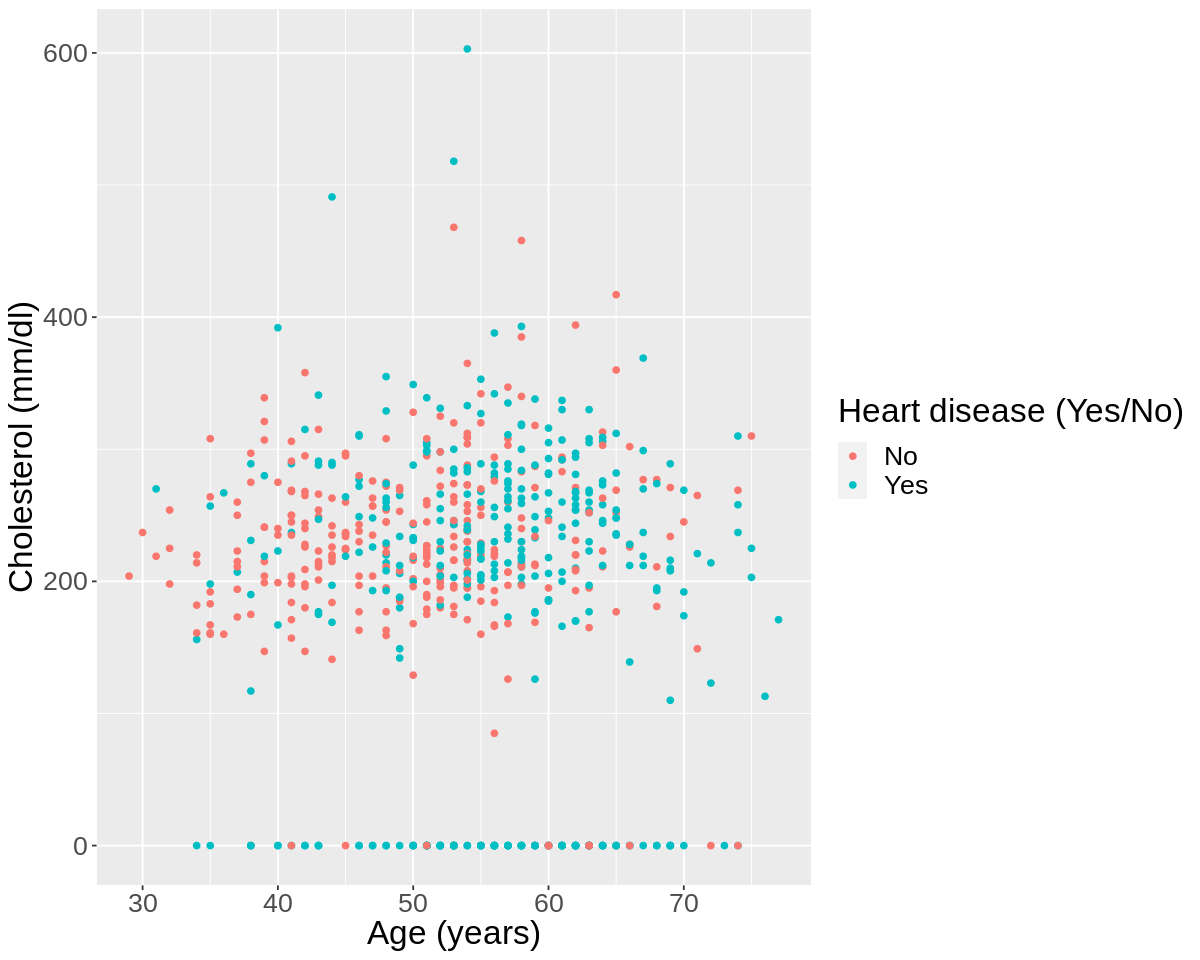

In [12]:
options(repr.plot.width = 10, repr.plot.height = 8) 
heart_train_plot_1 <- ggplot(heart_train, aes(x = Age, y = Cholesterol, color = HeartDisease))+
geom_point() +
labs(x = "Age (years)", y = "Cholesterol (mm/dl)", color = "Heart disease (Yes/No)")+
scale_colour_discrete(labels = c("No","Yes"))+
theme(text=element_text(size=20))
heart_train_plot_1

Figure 2: Scatterplot of Cholesterol versus Age colored by Heart disease label

Figure 2 reveals that there is no correlation present between heart disease and cholesterol levels. This is because all patients, regardless of their diagnosis for heart disease, are all within a similar cholesterol range. The graph shows that the number of observations for patients with heart disease does not increase nor decrease with cholesterol, therefore, it may not be a suitable predictor variable to use. In addition, the scatterplot again reveals that as age increases, the number of observations for the class label "yes" (signifying diagnosis for heart disease) also increases, suggesting a positive relationship between Age and heart disease.

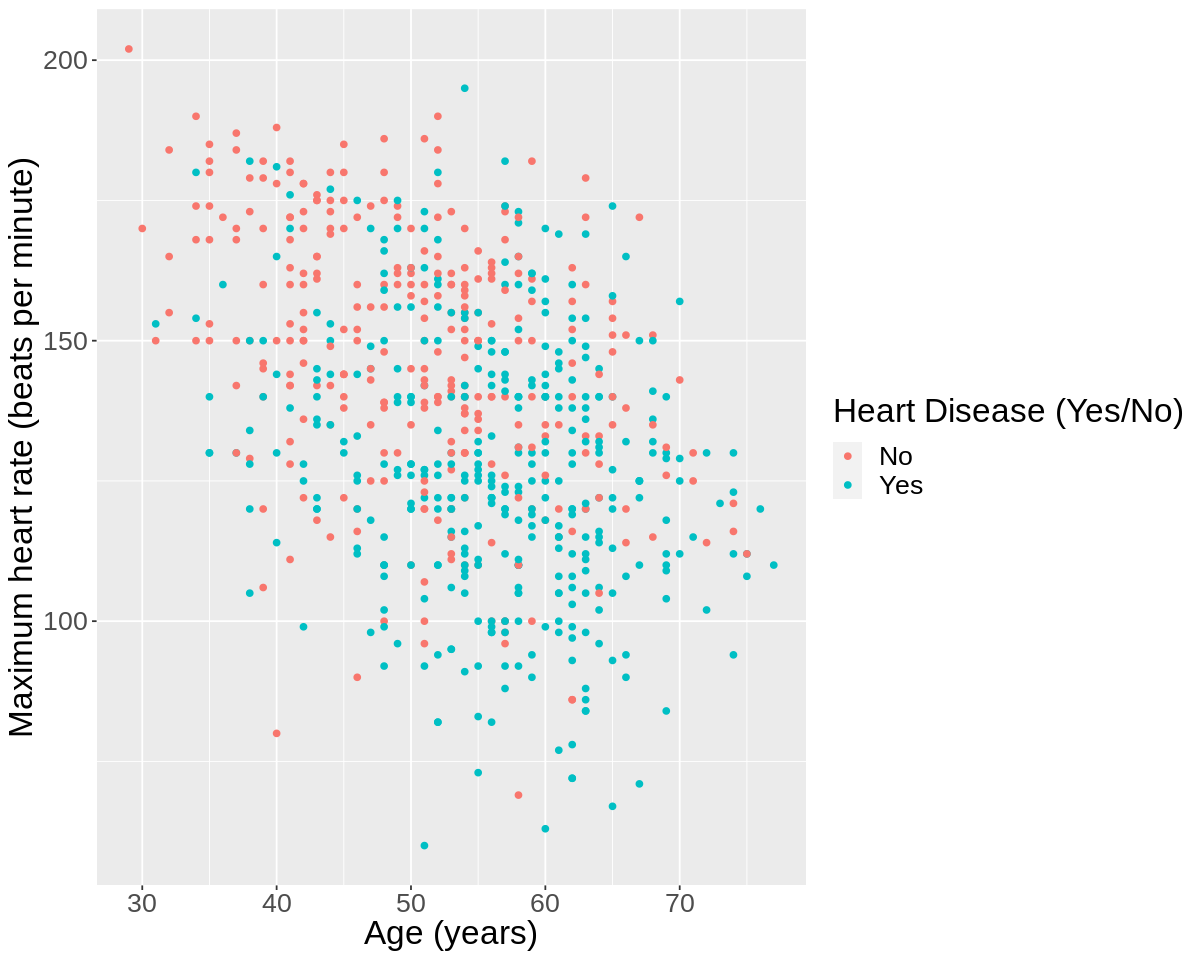

In [13]:
options(repr.plot.width = 10, repr.plot.height = 8) 
heart_train_plot_1 <- ggplot(heart_train, aes(x = Age, y = MaxHR , color = HeartDisease))+
geom_point() +
labs(x = "Age (years)", y = "Maximum heart rate (beats per minute)", color = "Heart Disease (Yes/No)")+
scale_colour_discrete(labels = c("No","Yes"))+
theme(text=element_text(size=20))
heart_train_plot_1

Figure 3: Scatterplot of Maximum Heart Rate versus Age colored by Heart disease label

Figure 3 illustrates that there is a negative correlation present between maximum heart rate and heart disease, with the number of observations for patients with heart disease increasing as their maximum heart rate decreases. The scatterplot illustrates quite a strong negative correlation, suggesting that this variable would be a suitable predictor to use in our analysis. 

Choosing our variables:

KNN Classification:

In [14]:
heart_new_coloumns <- select(heart_data_mutated, Age, RestingBP, MaxHR, HeartDisease)  
heart_new_coloumns

Age,RestingBP,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<fct>
40,140,172,0
49,160,156,1
37,130,98,0
⋮,⋮,⋮,⋮
57,130,115,1
57,130,174,1
38,138,173,0


Table 8: New selected coloumn variables to be used for KNN classification model

Since Cholesterol showed a lack of correlation with heart disease, it was removed as a predictor variable after performing the exploratory analysis. This meant that we had to refine our coloumn selection and choose only Age, Resting Blood pressure and Maximum heart rate as our predictor variables.

In [15]:
set.seed(2000)
heart_split_2 <- initial_split(heart_new_coloumns, prop = 0.75, strata = HeartDisease)
heart_train_2 <- training(heart_split_2)
heart_test_2 <- testing(heart_split_2)
heart_train_2

Age,RestingBP,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<fct>
49,160,156,1
48,138,108,1
54,150,122,0
⋮,⋮,⋮,⋮
68,144,141,1
57,130,174,1
38,138,173,0


Table 9: Refined training dataset with Age, Resting blood pressure and maximum heart rate as predictor variables for heart disease

In [16]:
heart_test_2

Age,RestingBP,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<fct>
40,140,172,0
37,130,98,0
48,120,120,0
⋮,⋮,⋮,⋮
56,120,169,0
63,140,144,1
57,130,115,1


Table 10: Refined testing dataset with Age, Resting blood pressure and maximum heart rate as predictor variables for heart disease

In [17]:
set.seed(2000)
heart_vfold <- vfold_cv(heart_train_2, v = 5, strata = HeartDisease)

To determine the appropriate classifier K value, a 5 fold cross-validation was conducted with the code above using only the training dataset. A 5 fold cross-calidation was used in order to obtain multiple different validation splits, providing a better accuracy estimate, which will aid in choosing the best value for K.

In [18]:
heart_recipe <- recipe(HeartDisease ~ . , 
                       data = heart_train_2) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

Since variables such as Maximum heart rate, measured in beats per minute, and Resting blood pressure, measured in mm Hg, have different scales of measurment, they must be standardized because K-nearest neighbors is sensitive to the scale of predictors. This is done in the recipe framework above using the step_scale function.

In [19]:
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
set_engine("kknn") %>%
set_mode("classification")

In [20]:
kvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

heart_workflow <- workflow() %>%
add_recipe(heart_recipe) %>%
add_model(heart_spec)%>%
tune_grid(resamples = heart_vfold, grid = kvals ) %>%
collect_metrics()
heart_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6355905,5,0.01394536,Model01
1,roc_auc,binary,0.6356181,5,0.01460186,Model01
6,accuracy,binary,0.6559443,5,0.01388923,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
91,roc_auc,binary,0.7213766,5,0.006195854,Model19
96,accuracy,binary,0.6749116,5,0.014272067,Model20
96,roc_auc,binary,0.7233872,5,0.005164620,Model20


Table 11: Illustartes mean and standard error for each K value from 1 to 100

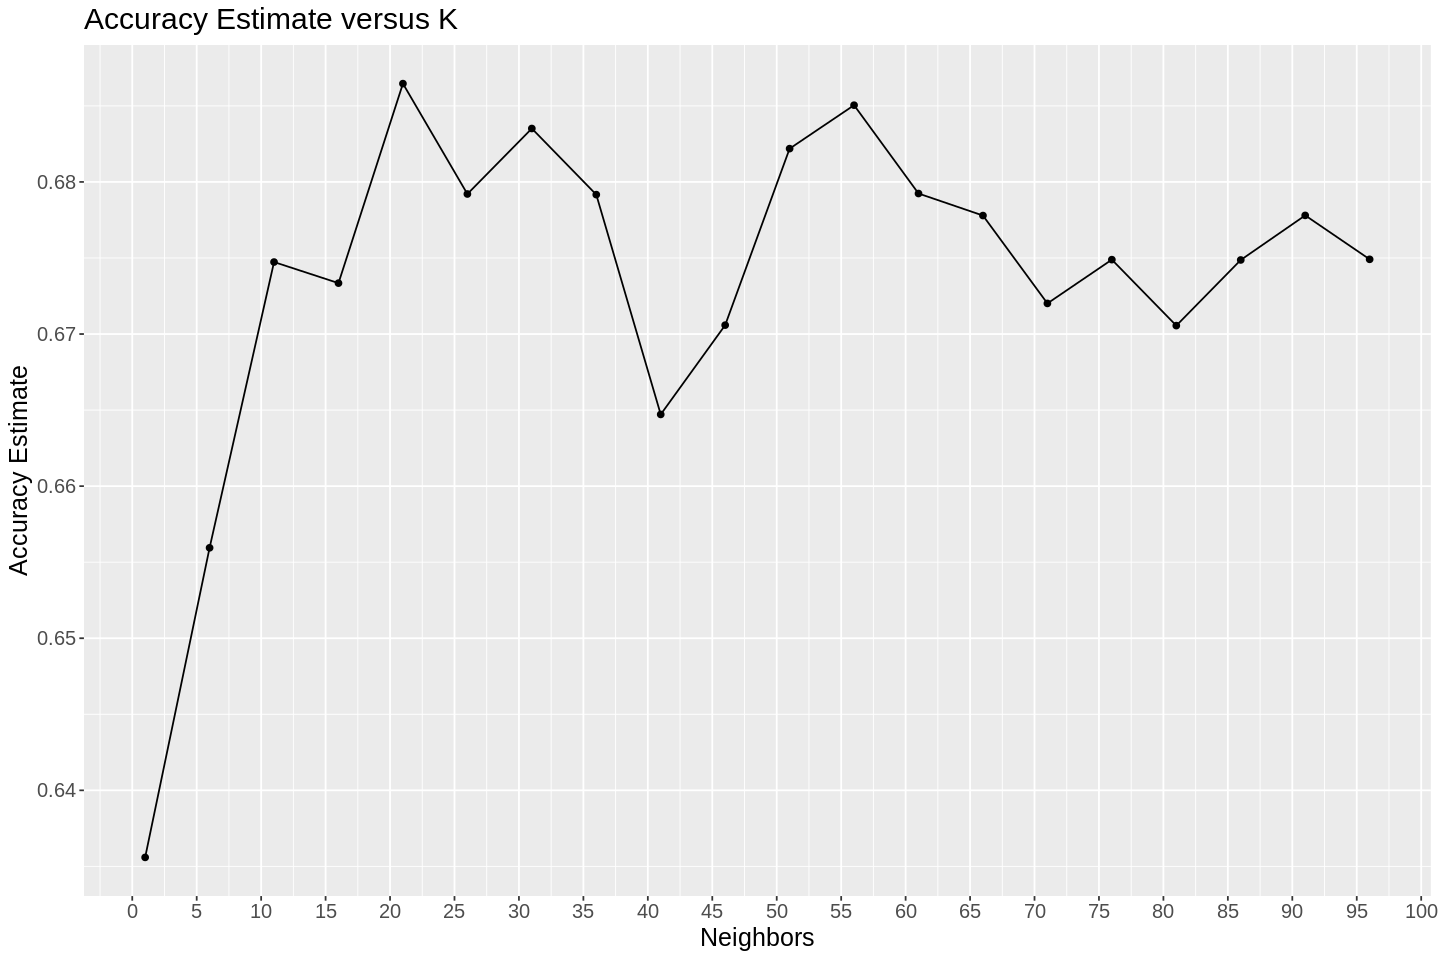

In [21]:
accuracies <- heart_workflow %>% 
filter(.metric == "accuracy")


options(repr.plot.width = 12, repr.plot.height = 8) 
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
 geom_point() +
 geom_line() +
 labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracy Estimate versus K") +
 scale_x_continuous(breaks = seq(0, 100, by = 5))+
theme(text=element_text(size=15))
accuracy_versus_k

Figure 4: Plot of estimated accuracy versus number of neighbors

Figure 4 shows that the K value possessing the highest accuracy is K =21, making it the most suitable classifier to use in our KNN model. 

In [22]:
heart_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 21 ) %>%
  set_engine("kknn") %>%
  set_mode("classification")

heart_fit <- workflow() %>%
  add_recipe(heart_recipe) %>%
  add_model(heart_spec_2) %>%
  fit(data = heart_train_2)

In [23]:
heart_test_predictions <- predict(heart_fit, heart_test_2) %>%
  bind_cols(heart_test_2)

After retraining the model with K = 21, the classification model is used to predict the class labels for heart disease using the predictor values in the test dataset using the code above. 

In [24]:
heart_test_accuracy <- heart_test_predictions %>%
  metrics(truth = HeartDisease, estimate = .pred_class) %>%
  filter(.metric == "accuracy")
heart_test_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7336245


Table 12: Estimated Accuracy of Classification model with K = 21, illustrating an accuracy of 73.3% for the classifier 

In [25]:
confusion <- heart_test_predictions %>%
             conf_mat(truth = HeartDisease, estimate = .pred_class)
confusion

          Truth
Prediction   0   1
         0  65  24
         1  37 103

Table 13: Confusion matrix showing the number of observations classified correctly and incorrectly with K =21 as the classifier

Classification Visualization:

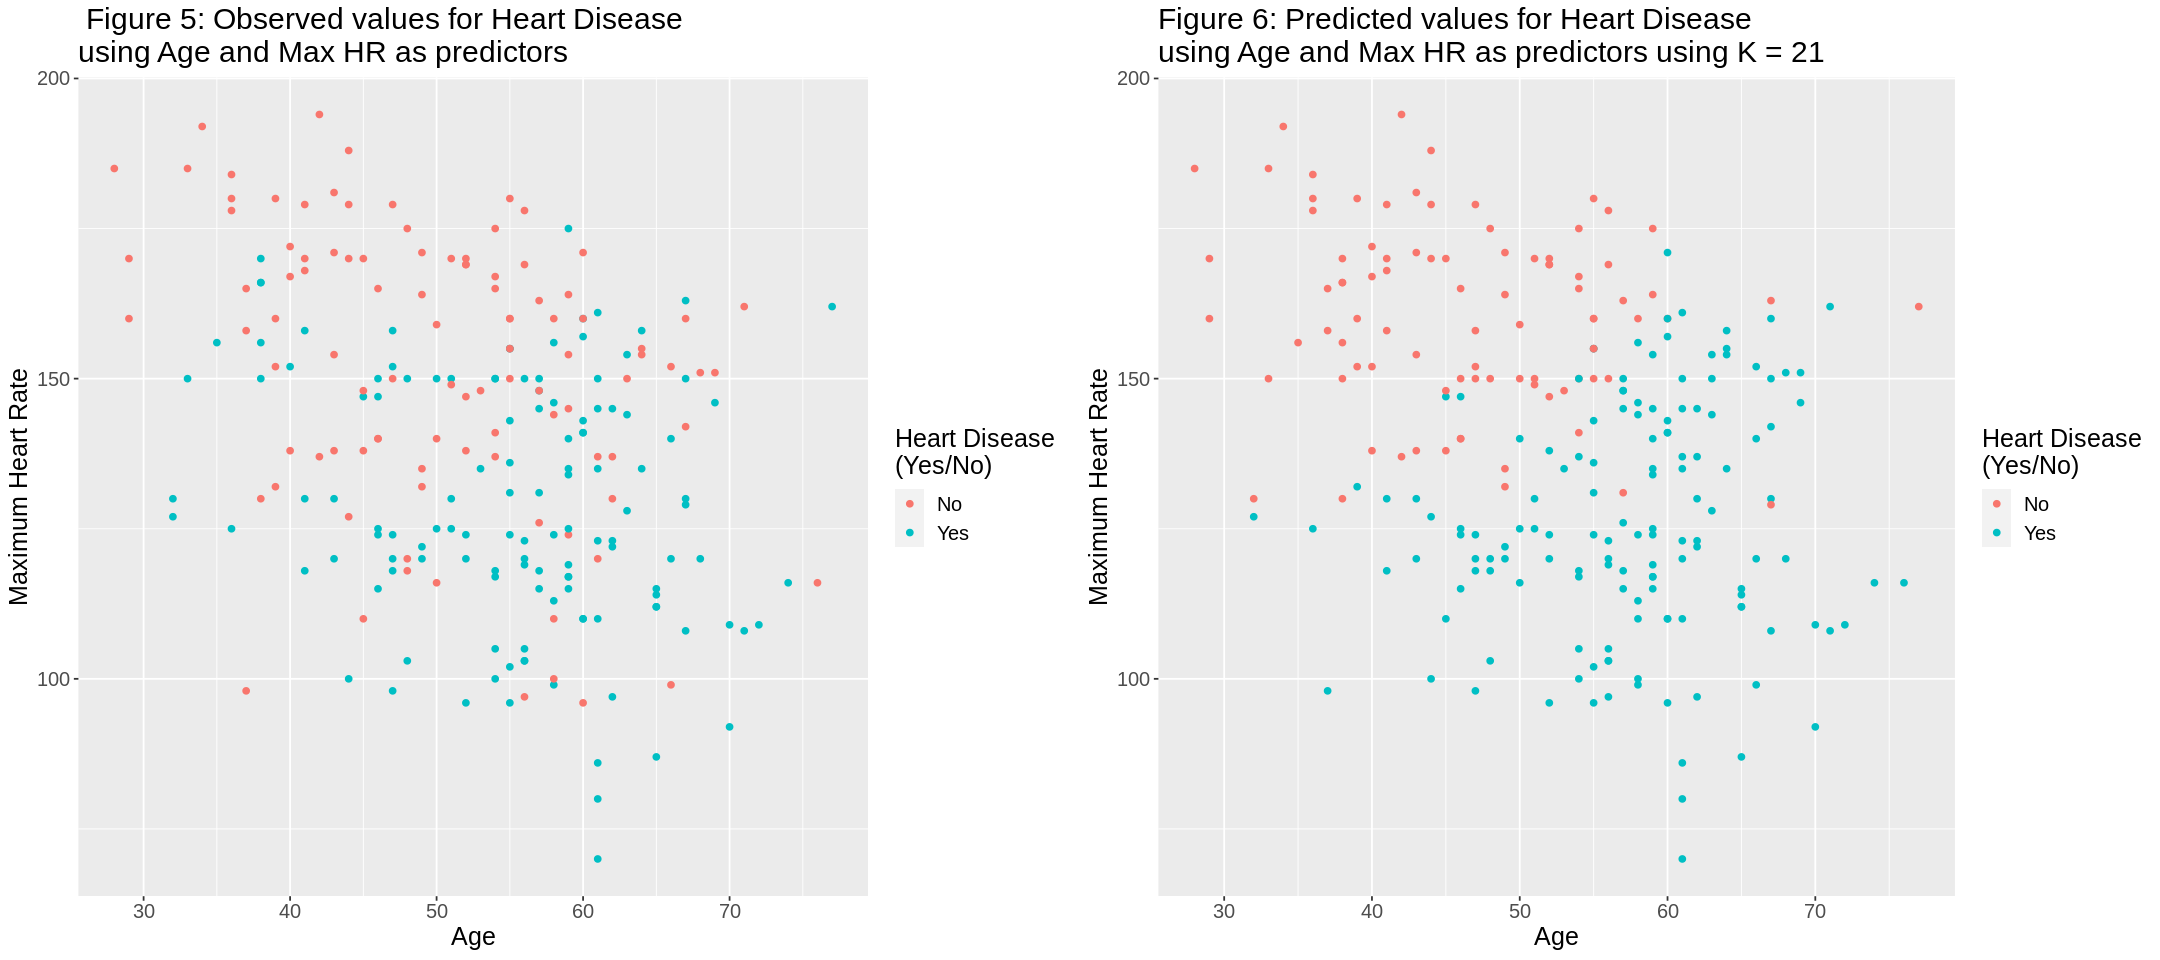

In [26]:
options(repr.plot.width = 18, repr.plot.height = 8) 
scatterplot_1 <- heart_test_predictions %>%
ggplot(aes(x = Age, y = MaxHR, colour = HeartDisease)) +
geom_point() +
labs( x = "Age", y = "Maximum Heart Rate", color = "Heart Disease 
(Yes/No)", title = " Figure 5: Observed values for Heart Disease 
using Age and Max HR as predictors")+
scale_colour_discrete(labels = c("No","Yes"))+
theme(text=element_text(size=15))


options(repr.plot.width = 18, repr.plot.height = 8)                    
scatterplot_2 <- heart_test_predictions %>%
ggplot(aes(x = Age, y = MaxHR, colour = .pred_class)) +
geom_point() +
labs( x = "Age", y = "Maximum Heart Rate", color = "Heart Disease
(Yes/No)", title = "Figure 6: Predicted values for Heart Disease 
using Age and Max HR as predictors using K = 21")+
scale_colour_discrete(labels = c("No","Yes"))+
theme(text=element_text(size=15))

scatterplots <- plot_grid(scatterplot_1, scatterplot_2, ncol = 2)
scatterplots
 

**Discussion (summary + impact of findings):**


Choosing our variables: 

The data set chosen consists of 12 total columns, 4 of which are quantitative, with the other eight being categorical. We knew we wanted our model to predict whether or not a patient likely had heart disease based on elementary statistics that a person would be able to easily find for themselves without extensive testing. This left us with using patient age, resting blood pressure, cholesterol, and maximum heart rate achieved in an hour. First however, we had to check if the variables even had any correlation to whether or a patient in our data set had heart disease. Using age as the common variable because it is the only one unaffected by the patient's health, we created plots comparing it to the other three variables, with a color difference (orange or blue) showing the status of heart disease. We then qualitatively observed the correlations between the different variables and heart disease. It was then where we deemed that within this particular data set, cholesterol has little to no correlation with whether or not someone currently had heart disease, so we decided it would not be used when developing the model. 

Summary + impact of findings : 

We found that our classifier had a 73.3 % accuracy when we used K = 21 for our KNN model. We chose this value for K because after carrying a 5 fold cross validation and plotting the K vs accuracy graph, we found K = 21 to have the highest peak on the graph, providing the highest accuracy. We did this using 100 nearest neighbors. The confusion matrix confirmed the accuracy of our model, by showing that 73.3 % of the predictions ( for both classes, those having heart disease and for those who don’t) matched the observed values.  This is not what we expected to find, because we predicted that the removal of Cholesterol as a predictor variable would increase the model’s accuracy significantly, since our exploratory analysis showed that cholesterol has no correlation with having heart disease. We picked Age and Max HR to use in our visualization of the data analysis because these two variables showed the strongest correlation with heart disease. After plotting two scatterplots, comparing the observed values versus the predicted values of our KNN model, we found them to be very similar with a small majority of the incorrectly predicted classes being in the center of the second plot. These incorrect predictions account for only 26.7% of our test data so the model does not seem to be overfitting or underfitting. Our findings show that max heart rate achieved in an hour, resting blood pressure, and age are all effective predictors of determining likeness of developing heart disease. However, because the accuracy was only 73.3 %, it is evident that more predictors outside of the ones provided in the dataset, should be examined and considered for predicting Heart Disease. Additional predictors with a 


**References:**

1. fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved April 2022 from 
       https://www.kaggle.com/fedesoriano/heart-failure-prediction.
        
        
2. Rapsomaniki, E., Timmis, A., George, J., Pujades-Rodriguez, M., Shah, A. D., Denaxas, S., White, I. R., Caulfield, M. J., Deanfield, J.E.,Smeeth, L., Williams, B., Hingorani, A., & Hemingway, H. (2014). Blood pressure and incidence of twelve cardiovascular diseases:lifetime risks, healthy life-years lost, and age-specific associations in 1·25 million people. Lancet (London, England), 383(9932),1899–1911.
       https://doi.org/10.1016/S0140-6736(14)60685-1